# 【問題1】コンペティション内容の確認
<br>
何を学習し、何を予測するのか
<br>
どのようなファイルを作りKaggleに提出するか
<br>
提出されたものはどういった指標値で評価されるのか

In [ ]:
アプリケーション_トレイン_CSVのデータを特徴量として利用し、信用度を０〜１の確率で予測する。
顧客IDとターゲットのヘッダーでそれぞれデータを入力し提出
ROC曲線の領域で評価（具体的なスコアの計算方法はわからない）

# 【問題2】学習と検証
<br>
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。
<br>
検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/suzukiyuuta/Downloads/application_train.csv')#教師データを読み込む

df_test = pd.read_csv('/Users/suzukiyuuta/Downloads/application_test.csv')

display(df.head())
display(df.info())
display(df.describe())

display(df.isnull().sum())
def null_search(df_train):
    for i in df_train.columns:
        print("■■■  " + i )
        print("NULL数:" + str(df_train[i].isnull().sum() ))#+
#                  "　　　　NULL率:" + str((df_train[i].isnull().sum()/len(df_train)).round(3)) +
#                  "    データの種類数:" + str(df_train[i].value_counts().count()))
null_search(df)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

■■■  SK_ID_CURR
NULL数:0
■■■  TARGET
NULL数:0
■■■  NAME_CONTRACT_TYPE
NULL数:0
■■■  CODE_GENDER
NULL数:0
■■■  FLAG_OWN_CAR
NULL数:0
■■■  FLAG_OWN_REALTY
NULL数:0
■■■  CNT_CHILDREN
NULL数:0
■■■  AMT_INCOME_TOTAL
NULL数:0
■■■  AMT_CREDIT
NULL数:0
■■■  AMT_ANNUITY
NULL数:12
■■■  AMT_GOODS_PRICE
NULL数:278
■■■  NAME_TYPE_SUITE
NULL数:1292
■■■  NAME_INCOME_TYPE
NULL数:0
■■■  NAME_EDUCATION_TYPE
NULL数:0
■■■  NAME_FAMILY_STATUS
NULL数:0
■■■  NAME_HOUSING_TYPE
NULL数:0
■■■  REGION_POPULATION_RELATIVE
NULL数:0
■■■  DAYS_BIRTH
NULL数:0
■■■  DAYS_EMPLOYED
NULL数:0
■■■  DAYS_REGISTRATION
NULL数:0
■■■  DAYS_ID_PUBLISH
NULL数:0
■■■  OWN_CAR_AGE
NULL数:202929
■■■  FLAG_MOBIL
NULL数:0
■■■  FLAG_EMP_PHONE
NULL数:0
■■■  FLAG_WORK_PHONE
NULL数:0
■■■  FLAG_CONT_MOBILE
NULL数:0
■■■  FLAG_PHONE
NULL数:0
■■■  FLAG_EMAIL
NULL数:0
■■■  OCCUPATION_TYPE
NULL数:96391
■■■  CNT_FAM_MEMBERS
NULL数:2
■■■  REGION_RATING_CLIENT
NULL数:0
■■■  REGION_RATING_CLIENT_W_CITY
NULL数:0
■■■  WEEKDAY_APPR_PROCESS_START
NULL数:0
■■■  HOUR_APPR_PROCESS_START
NUL

In [2]:
df_X_train = df.loc[:,['AMT_CREDIT','AMT_INCOME_TOTAL']] 
df_Y_train = df.loc[:,['TARGET']]
print(df_X_train)
print(df_Y_train)

df_X_test = df_test.loc[:,['AMT_CREDIT','AMT_INCOME_TOTAL']] 
df_X_ID = df_test.loc[:,['SK_ID_CURR']] 
print(df_X_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_X_train)
X_train_std = scaler.transform(df_X_train)

scaler = StandardScaler()
scaler.fit(df_X_test)
X_test_std = scaler.transform(df_X_test)
# X_test_std =  scaler.transform(X_test)
# print(X_train_std)
# X_train_std_pd = pd.DataFrame(X_train_std)
# X_train_std_pd.describe()

        AMT_CREDIT  AMT_INCOME_TOTAL
0         406597.5          202500.0
1        1293502.5          270000.0
2         135000.0           67500.0
3         312682.5          135000.0
4         513000.0          121500.0
...            ...               ...
307506    254700.0          157500.0
307507    269550.0           72000.0
307508    677664.0          153000.0
307509    370107.0          171000.0
307510    675000.0          157500.0

[307511 rows x 2 columns]
        TARGET
0            1
1            0
2            0
3            0
4            0
...        ...
307506       0
307507       0
307508       0
307509       1
307510       0

[307511 rows x 1 columns]
       AMT_CREDIT  AMT_INCOME_TOTAL
0        568800.0          135000.0
1        222768.0           99000.0
2        663264.0          202500.0
3       1575000.0          315000.0
4        625500.0          180000.0
...           ...               ...
48739    412560.0          121500.0
48740    622413.0          157500.

       SK_ID_CURR    TARGET
0               0  0.000000
1               0  0.000000
2          100013  0.077449
3          100028  0.056963
4          100038  0.078259
...           ...       ...
48739      456221  0.082975
48740      456222  0.078281
48741      456223  0.085367
48742      456224  0.082346
48743      456250  0.085273

[48744 rows x 2 columns]
MSE : 0.07414318566630679


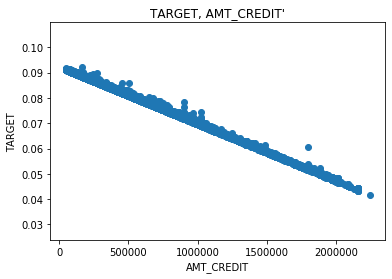

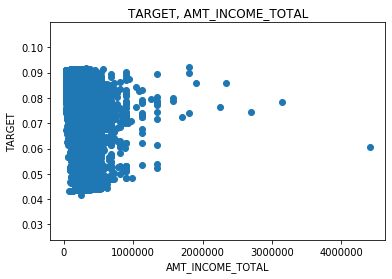

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# インスタンス作成から学習
linear_reg = LinearRegression()
linear_reg.fit(X_train_std, df_Y_train)

# 推定
y_pred = linear_reg.predict(X_test_std)
df_target = pd.DataFrame(y_pred ,columns = ['TARGET'])

# テスト用
y_pred_train = linear_reg.predict(X_train_std)

df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET']] = 0

print(df_submission)

# submission = pd.concat([df_X_ID, y_pred], axis=1,)

# submission[:100]

# print(type(df_X_ID))
# print(type(y_pred))

df_submission.to_csv("suzuki0.csv",index=False)

#平均二乗誤差（標準偏差、ばらつき、MSE）を求める
print("MSE : {}".format(mean_squared_error(df_Y_train, y_pred_train)))

# 可視化
plt.title("TARGET, AMT_CREDIT'")
plt.xlabel("AMT_CREDIT")
plt.ylabel("TARGET")
plt.scatter(df_X_test["AMT_CREDIT"], y_pred)
plt.show()

plt.title("TARGET, AMT_INCOME_TOTAL")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("TARGET")
plt.scatter(df_X_test["AMT_INCOME_TOTAL"], y_pred)
plt.show()

MSE : 0.07565635627627204
        TARGET
207594       0
6640         0
23432        0
35570        0
109822       0
...        ...
292587       0
5595         0
64294        0
91998        0
246265       0

[230633 rows x 1 columns]


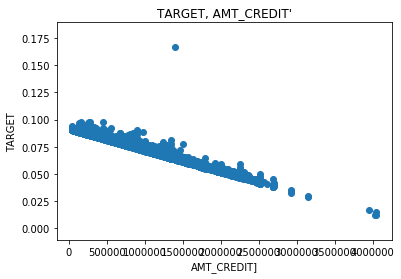

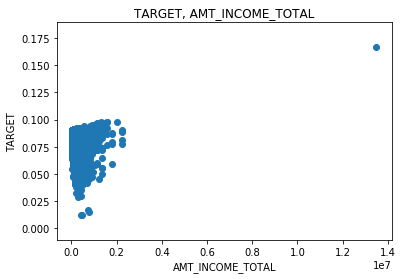

In [6]:
# 以下評価用
from sklearn.model_selection import train_test_split
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(df_X_train,df_Y_train)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_sam)
X_train_sam_std = scaler.transform(X_train_sam)

scaler = StandardScaler()
scaler.fit(X_test_sam)
X_test_sam_std = scaler.transform(X_test_sam)

# 学習評価
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# インスタンス作成から学習
linear_reg = LinearRegression()
linear_reg.fit(X_train_sam_std, y_train_sam)

# 推定
y_pred = linear_reg.predict(X_test_sam_std)
# df_target = pd.DataFrame(y_pred ,columns = ['TARGET'])

# テスト用
y_pred_train = linear_reg.predict(X_train_std)

# df_submission = pd.concat([df_X_ID, df_target], axis=1,)
# df_submission.loc[df['TARGET']] = 0

# print(df_submission)

print("MSE : {}".format(mean_squared_error(y_test_sam, y_pred)))

print(y_train_sam)
# print(y_pred[:100])

plt.title("TARGET, AMT_CREDIT'")
plt.xlabel("AMT_CREDIT]")
plt.ylabel("TARGET")
plt.scatter(X_test_sam["AMT_CREDIT"], y_pred)
plt.show()

plt.title("TARGET, AMT_INCOME_TOTAL")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("TARGET")
plt.scatter(X_test_sam["AMT_INCOME_TOTAL"], y_pred)
plt.show()

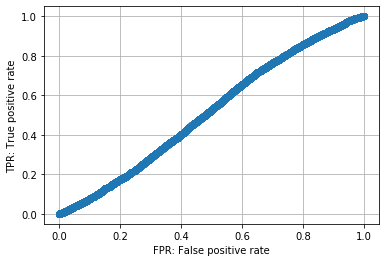

In [7]:
# ROC分析
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_sam, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
# plt.savefig('data/dst/sklearn_roc_curve.png')

# 【問題3】テストデータに対する推定

上記のデータでカグルに提出
<br>
Private Score
<br>
0.51823
<br>
Public Score
<br>
0.51330

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


       SK_ID_CURR    TARGET
0               0  0.000000
1               0  0.000000
2          100013  0.077449
3          100028  0.056963
4          100038  0.078259
...           ...       ...
48739      456221  0.082975
48740      456222  0.078281
48741      456223  0.085367
48742      456224  0.082346
48743      456250  0.085273

[48744 rows x 2 columns]
MSE : 0.08752088651256079
        TARGET
207594       0
6640         0
23432        0
35570        0
109822       0
...        ...
292587       0
5595         0
64294        0
91998        0
246265       0

[230633 rows x 1 columns]


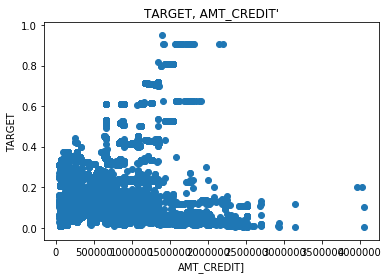

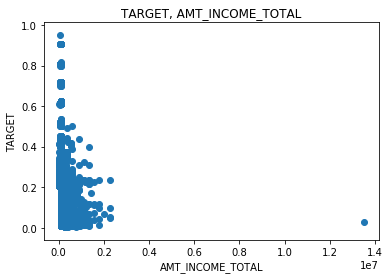

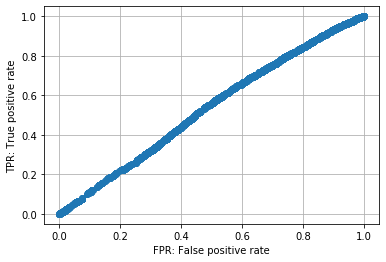

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf5 = RandomForestClassifier(max_depth = 10)
clf5.fit(X_train_sam_std, y_train_sam)

# 推定
y_pred = clf5.predict_proba(X_test_sam_std)[:, 1:2]
# df_target = pd.DataFrame(y_pred ,columns = ['TARGET'])

# テスト用
y_pred_train = clf5.predict_proba(X_train_std)[:, 1:2]

# print(y_pred)
# print(y_pred_train)


df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET']] = 0

print(df_submission)

print("MSE : {}".format(mean_squared_error(y_test_sam, y_pred)))

print(y_train_sam)
# print(y_pred[:100])

plt.title("TARGET, AMT_CREDIT'")
plt.xlabel("AMT_CREDIT]")
plt.ylabel("TARGET")
plt.scatter(X_test_sam["AMT_CREDIT"], y_pred)
plt.show()

plt.title("TARGET, AMT_INCOME_TOTAL")
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("TARGET")
plt.scatter(X_test_sam["AMT_INCOME_TOTAL"], y_pred)
plt.show()

# ROC分析
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_sam, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
# plt.savefig('data/dst/sklearn_roc_curve.png')


# 【問題4】特徴量エンジニアリング

In [71]:
df = pd.read_csv('/Users/suzukiyuuta/Downloads/application_train.csv')#教師データを読み込む
df_test = pd.read_csv('/Users/suzukiyuuta/Downloads/application_test.csv')


In [32]:
#1特徴量を増やす１
df_X_train = df.loc[:,["EXT_SOURCE_1","EXT_SOURCE_3","EXT_SOURCE_2"'AMT_CREDIT','AMT_INCOME_TOTAL','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN']] 
df_Y_train = df.loc[:,['TARGET']]
from sklearn.model_selection import train_test_split
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(df_X_train,df_Y_train)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


MSE : 0.07728181445147088
AUC: 0.5008537412967028


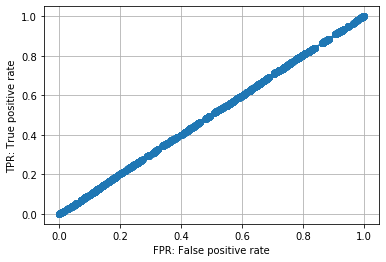

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf5 = RandomForestClassifier(max_depth = 10)
clf5.fit(X_train_sam_std, y_train_sam)

# 推定
y_pred = clf5.predict_proba(X_test_sam_std)[:, 1:2]

y_pred_train = clf5.predict_proba(X_train_std)[:, 1:2]

df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET']] = 0

print("MSE : {}".format(mean_squared_error(y_test_sam, y_pred)))

# ROC分析
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_sam, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print("AUC: {}".format(roc_auc_score(y_test_sam, y_pred)))
# plt.savefig('data/dst/sklearn_roc_curve.png')

In [72]:
#2特徴量を増やす２
df_X_train = df.loc[:,["EXT_SOURCE_1","EXT_SOURCE_3",'AMT_CREDIT','AMT_INCOME_TOTAL',\
                    'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',\
                  "AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_REGISTRATION"]] 
df_Y_train = df.loc[:,['TARGET']]
from sklearn.model_selection import train_test_split
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(df_X_train,df_Y_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


MSE : 0.07777520540045929
AUC: 0.5024243957320774


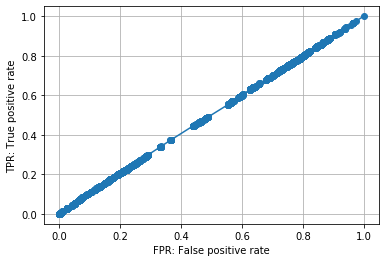

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf5 = RandomForestClassifier(max_depth = 10)
clf5.fit(X_train_sam_std, y_train_sam)

# 推定
y_pred = clf5.predict_proba(X_test_sam_std)[:, 1:2]

y_pred_train = clf5.predict_proba(X_train_std)[:, 1:2]

df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET']] = 0

print("MSE : {}".format(mean_squared_error(y_test_sam, y_pred)))

# ROC分析
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_sam, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print("AUC: {}".format(roc_auc_score(y_test_sam, y_pred)))
# plt.savefig('data/dst/sklearn_roc_curve.png')

In [74]:
display(df_X_train.describe())
null_search(df_X_train)
display(df_X_train.head())

,EXT_SOURCE_1,EXT_SOURCE_3,AMT_CREDIT,AMT_INCOME_TOTAL,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_REGISTRATION
count,134133.000000,246546.000000,3.075110e+05,3.075110e+05,307511.000000,307499.000000,3.072330e+05,307511.000000
mean,0.502130,0.510853,5.990260e+05,1.687979e+05,0.417052,27108.573909,5.383962e+05,-4986.120328
std,0.211062,0.194844,4.024908e+05,2.371231e+05,0.722121,14493.737315,3.694465e+05,3522.886321
min,0.014568,0.000527,4.500000e+04,2.565000e+04,0.000000,1615.500000,4.050000e+04,-24672.000000
25%,0.334007,0.370650,2.700000e+05,1.125000e+05,0.000000,16524.000000,2.385000e+05,-7479.500000
50%,0.505998,0.535276,5.135310e+05,1.471500e+05,0.000000,24903.000000,4.500000e+05,-4504.000000
75%,0.675053,0.669057,8.086500e+05,2.025000e+05,1.000000,34596.000000,6.795000e+05,-2010.000000
max,0.962693,0.896010,4.050000e+06,1.170000e+08,19.000000,258025.500000,4.050000e+06,0.000000


■■■  EXT_SOURCE_1
NULL数:173378
■■■  EXT_SOURCE_3
NULL数:60965
■■■  AMT_CREDIT
NULL数:0
■■■  AMT_INCOME_TOTAL
NULL数:0
■■■  FLAG_OWN_CAR
NULL数:0
■■■  FLAG_OWN_REALTY
NULL数:0
■■■  CNT_CHILDREN
NULL数:0
■■■  AMT_ANNUITY
NULL数:12
■■■  AMT_GOODS_PRICE
NULL数:278
■■■  DAYS_REGISTRATION
NULL数:0


,EXT_SOURCE_1,EXT_SOURCE_3,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_REGISTRATION
0,0.083037,0.139376,406597.5,202500.0,N,Y,0,24700.5,351000.0,-3648.0
1,0.311267,NaN,1293502.5,270000.0,N,N,0,35698.5,1129500.0,-1186.0
2,NaN,0.729567,135000.0,67500.0,Y,Y,0,6750.0,135000.0,-4260.0
3,NaN,NaN,312682.5,135000.0,N,Y,0,29686.5,297000.0,-9833.0
4,NaN,NaN,513000.0,121500.0,N,Y,0,21865.5,513000.0,-4311.0


In [65]:
print(df_X_train["DAYS_REGISTRATION"].unique().tolist())

[-3648.0, -1186.0, -4260.0, -9833.0, -4311.0, -4970.0, -1213.0, -4597.0, -7427.0, -14437.0, -4427.0, -5246.0, -311.0, -643.0, -615.0, -3494.0, -6392.0, -4143.0, -8751.0, -1021.0, -298.0, -2299.0, -114.0, -9012.0, -108.0, -2419.0, -6573.0, -5782.0, -4668.0, -4799.0, -5266.0, -7846.0, -7123.0, -3557.0, -5735.0, -6265.0, -63.0, -5474.0, -9817.0, -8236.0, -1182.0, -3148.0, -45.0, -5745.0, -4166.0, -6591.0, -7760.0, -9197.0, -6225.0, -5504.0, -1149.0, -3904.0, -1824.0, -2025.0, -6936.0, -7054.0, -2019.0, -4375.0, -2128.0, -6846.0, -6755.0, -4557.0, -1042.0, -5448.0, -6105.0, -6836.0, -5076.0, -8118.0, -4809.0, -1377.0, -341.0, -23.0, -3253.0, -4327.0, -1529.0, -4623.0, -4437.0, -1701.0, -12623.0, -10255.0, -5391.0, -3500.0, -7211.0, -9506.0, -3134.0, -7421.0, -6913.0, -6057.0, -6769.0, -4493.0, -5146.0, -442.0, -4628.0, -4802.0, -9176.0, -7913.0, -3071.0, -3390.0, -217.0, -4987.0, -4329.0, -9388.0, -550.0, -3917.0, -7040.0, -2376.0, -2124.0, -10150.0, -4066.0, -387.0, -7953.0, -14666.0, -40

In [78]:
#3特徴量を標準化
df_X_train = df.loc[:,["EXT_SOURCE_1","EXT_SOURCE_3",'AMT_CREDIT','AMT_INCOME_TOTAL',\
                    'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',\
                  "AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_REGISTRATION"]] 
df_Y_train = df.loc[:,['TARGET']]

df_X_train1 = df_X_train.loc[:,["EXT_SOURCE_1","EXT_SOURCE_3"]]
df_X_train2 = df_X_train.loc[:,['AMT_CREDIT','AMT_INCOME_TOTAL',"AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_REGISTRATION"]]
df_X_train3 = df_X_train.loc[:,['CNT_CHILDREN','FLAG_OWN_CAR','FLAG_OWN_REALTY']]


,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_REGISTRATION
0,406597.5,202500.0,24700.5,351000.0,-3648.0
1,1293502.5,270000.0,35698.5,1129500.0,-1186.0
2,135000.0,67500.0,6750.0,135000.0,-4260.0
3,312682.5,135000.0,29686.5,297000.0,-9833.0
4,513000.0,121500.0,21865.5,513000.0,-4311.0


In [79]:
# 欠損値に０を入れる
df_X_train1 = df_X_train1.fillna(0)
type()

In [82]:
# 標準化する
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_X_train2)
df_X_train2_std = pd.DataFrame(scaler.transform(df_X_train2))
df_X_train2_std = df_X_train2_std.fillna(0)

In [93]:
# ワンホット化
from sklearn.preprocessing import OneHotEncoder
df_X_train3_1 = df_X_train3.loc[:,['FLAG_OWN_CAR','FLAG_OWN_REALTY']]
enc = OneHotEncoder(categories="auto", sparse=False, dtype=np.float32)
onehot_df_X_train3_1 = pd.DataFrame(enc.fit_transform(df_X_train3_1))

In [87]:
from sklearn.preprocessing import OneHotEncoder
df_X_train3_2 = df_X_train3.loc[:,['CNT_CHILDREN']]
df_X_train3_2.loc[df_X_train3_2['CNT_CHILDREN'] < 8, 'CNT_CHILDREN'] = 0
df_X_train3_2.loc[df_X_train3_2['CNT_CHILDREN'] >= 8, 'CNT_CHILDREN'] = 1

In [97]:
onehot_df_X_train3_2 = pd.DataFrame(enc.fit_transform(df_X_train3_2))

In [98]:
print(type(df_X_train1))
print(type(df_X_train2_std))
print(type(onehot_df_X_train3_1))
print(type(onehot_df_X_train3_2))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [99]:
df_X_train_trans = pd.concat([df_X_train1, df_X_train2_std, onehot_df_X_train3_1, onehot_df_X_train3_2], axis=1,)

In [101]:
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(df_X_train_trans,df_Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE : 0.0722562242136284
AUC: 0.688048827018213


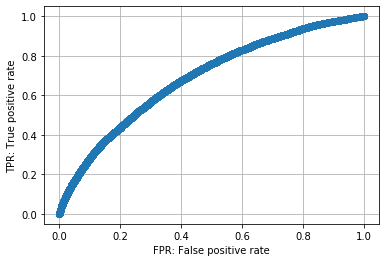

In [103]:
# 欠損値処理＊標準化＊ワンホット
clf5 = RandomForestClassifier(max_depth = 10)
clf5.fit(X_train_sam, y_train_sam)

# 推定
y_pred = clf5.predict_proba(X_test_sam)[:, 1:2]

y_pred_train = clf5.predict_proba(X_train_sam)[:, 1:2]

df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET']] = 0

print("MSE : {}".format(mean_squared_error(y_test_sam, y_pred)))

# ROC分析
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_sam, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print("AUC: {}".format(roc_auc_score(y_test_sam, y_pred)))
# plt.savefig('data/dst/sklearn_roc_curve.png')

In [ ]:
# 欠損値処理

In [110]:
df_X_train_trans = pd.concat([df_X_train1], axis=1,)
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(df_X_train_trans,df_Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE : 0.07133635688908571
AUC: 0.679305013179318


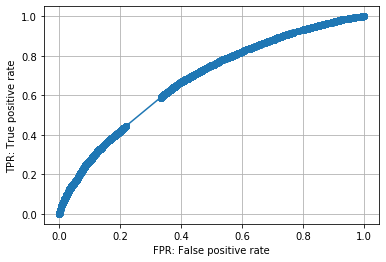

In [111]:
clf5 = RandomForestClassifier(max_depth = 10)
clf5.fit(X_train_sam, y_train_sam)

# 推定
y_pred = clf5.predict_proba(X_test_sam)[:, 1:2]

y_pred_train = clf5.predict_proba(X_train_sam)[:, 1:2]

df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET']] = 0

print("MSE : {}".format(mean_squared_error(y_test_sam, y_pred)))

# ROC分析
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_sam, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print("AUC: {}".format(roc_auc_score(y_test_sam, y_pred)))
# plt.savefig('data/dst/sklearn_roc_curve.png')

In [ ]:
# 欠損値処理＊標準化

In [112]:
df_X_train_trans = pd.concat([df_X_train1, df_X_train2_std], axis=1,)
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(df_X_train_trans,df_Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE : 0.07258203733548219
AUC: 0.6909848359198649


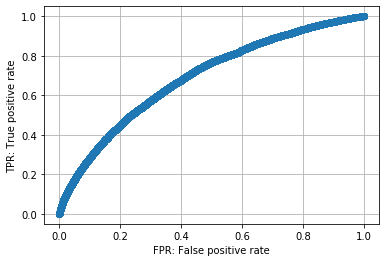

In [113]:
clf5 = RandomForestClassifier(max_depth = 10)
clf5.fit(X_train_sam, y_train_sam)

# 推定
y_pred = clf5.predict_proba(X_test_sam)[:, 1:2]

y_pred_train = clf5.predict_proba(X_train_sam)[:, 1:2]

df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET']] = 0

print("MSE : {}".format(mean_squared_error(y_test_sam, y_pred)))

# ROC分析
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_sam, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print("AUC: {}".format(roc_auc_score(y_test_sam, y_pred)))
# plt.savefig('data/dst/sklearn_roc_curve.png')

In [ ]:
# 欠損値処理＊ワンホット

In [114]:
df_X_train_trans = pd.concat([df_X_train1, onehot_df_X_train3_1, onehot_df_X_train3_2], axis=1,)
X_train_sam, X_test_sam, y_train_sam, y_test_sam = train_test_split(df_X_train_trans,df_Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


MSE : 0.07172903523032467
AUC: 0.6831220018590426


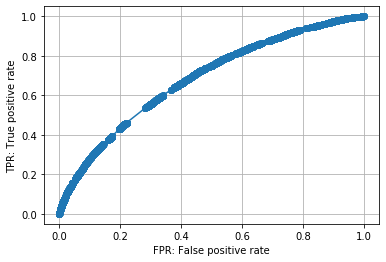

In [115]:
clf5 = RandomForestClassifier(max_depth = 10)
clf5.fit(X_train_sam, y_train_sam)

# 推定
y_pred = clf5.predict_proba(X_test_sam)[:, 1:2]

y_pred_train = clf5.predict_proba(X_train_sam)[:, 1:2]

df_submission = pd.concat([df_X_ID, df_target], axis=1,)
df_submission.loc[df['TARGET']] = 0

print("MSE : {}".format(mean_squared_error(y_test_sam, y_pred)))

# ROC分析
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_sam, y_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
print("AUC: {}".format(roc_auc_score(y_test_sam, y_pred)))
# plt.savefig('data/dst/sklearn_roc_curve.png')